In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Práctica 1: Pasos elementales del GA


Los Algoritmos Genéticos (GA de sus siglas en inglés) son herramientas computacionales de búsqueda de soluciones _óptimas_ mediante la aplicación de las leyes de la evolución y selección en genomas que codifican el problema que se pretende resolver. 

Así como los sistemas naturales han encontrado soluciones óptimas durante su evolución, estos métodos incluyen mecanismos de variación para explorar nuevas soluciones junto con la capacidad de selección de las mejores en cada paso. 

De esta manera, los GA son muy eficaces para encontrar soluciones óptimas de problemas complejos en los que existe un gran número de extremos locales.


En esta sección vamos a definir algunos de los pasos elementales de los algoritmos genéticos, a saber:
1. Codificación del problema en los genotipos / fenotipos
2. Creacción de una población de genotipos
3. Replicación con mutación
4. Selección de los mejores fenotipos / genotipos

Dejamos para la última sección la finalización del GA con los pasos:

5. Repetición de esta secuencia hasta convergencia
6. Comprobación e interpretación del resultado en el problema original


## Codificación del problema: genotipos

Este primer paso es esencial en la aplicación de los GA para la resolución de un problema. Las posibles soluciones deben ser relacionadas con las posibles configuraciones de los genotipos. Por ejemplo, podemos relacionar una propiedad del sistema con una posición en la secuencia del genotipo.

$$
\text{Propiedad del problema}\leftrightarrow\text{Gen concreto}
$$

En el estudio de una ruta metabólica de $\nu$ (`nu`) reacciones, un 1 en la posición $i$-ésima significa que esa reacción tienen lugar (existe la enzima), mientras que un 0 representa lo contrario, que la reacción no se da. 

Con esta codificación, un genoma está representando una posible ruta metabólica y todas las posibles rutas metábolicas quedan asignadas en todos los posibles genomas binarios de longitud `nu`, en total $2^\nu$. 

Una población inicial de tamaño $N$ constituye, por tanto, un punto de partida para explorar las posibles rutas metabólicas que relacionan un sustrato con un producto. 

Esta población se puede generar de acuerdo a un patrón o completamente al azar si no se tiene ninguna información previa. Por ejemplo, se podría definir la proporción de 1 en los genotipos que forman la población inicial con el parámetro `probuno`.

In [2]:
probuno = 0.1
N = 100
nu = 10
binGen = np.zeros((N,nu))

In [3]:
(np.random.uniform(size=10)<probuno).astype('int')

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [4]:
for genoma in range(N):
    binGen[genoma,:]= (np.random.uniform(size=10)<probuno).astype('int')

In [5]:
binGen[:10,:]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [6]:
binGen.sum()

88.0

En una función

In [7]:
def crearGenoma(N,nu,probUno):
    binGen = np.zeros((N,nu))
    for genoma in range(N):
        binGen[genoma,:]= (np.random.uniform(size=10)<probuno).astype('int')
    return binGen

## Asignación del fitness: fenotipos

Una vez que se ha definido el significado de un genotipo, una población de genomas de longitud nu representa una conjunto de rutas metabólicas factibles que realizarán una transformación de una manera más o menos eficaz.

Precisamente, la eficacia de la ruta define el fitness de ese genoma y constituye su fenotipo. Podríamos pensar que una ruta es más eficaz energéticamente si es más larga y, por lo tanto, su fitness depende del número de reacciones que la constituyen. Además, podríamos suponer que las reacciones del final de la ruta aportan más al fitness. 

En este caso, el fitness se podría calcular de manera inmedita a partir del número de 1 del genotipo y la posición que ocupan.

In [8]:
vector = np.arange(nu)+1
vector

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [9]:
binGen[0,:]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [10]:
vector.dot(binGen[0,:])

7.0

In [11]:
fitnessV = []
for ii in range(N):
    fit = vector.dot(binGen[ii,:])
    fitnessV.append(fit)

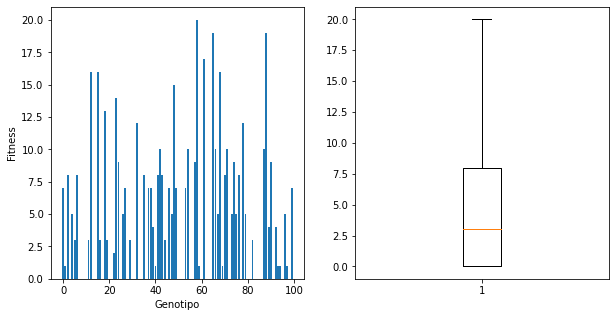

In [12]:
f,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax[0].bar(np.arange(len(fitnessV)),fitnessV)
ax[0].set_xlabel('Genotipo')
ax[0].set_ylabel('Fitness')
ax[1].boxplot(fitnessV)
plt.show()

In [13]:
# ordenamos de mayor a menor
indexOrder = np.argsort(fitnessV)
indexOrder

array([86, 30, 31, 63, 33, 34, 85, 36, 84, 83, 81, 28, 80, 77, 98, 50, 51,
       52, 55, 56, 72, 60, 62, 45, 25, 64,  3, 95, 13, 10,  9, 14,  8, 17,
       20, 21,  7, 91, 93,  1, 94, 40, 97, 59, 69, 22, 11,  5, 16, 19, 29,
       44, 82, 39, 92, 89, 67, 26, 73, 75, 96, 47, 79,  4,  0, 49, 99, 27,
       37, 38, 46, 53,  2,  6, 35, 43, 41, 70, 76, 74, 57, 90, 24, 66, 54,
       42, 71, 87, 78, 32, 18, 23, 48, 15, 12, 68, 61, 65, 88, 58])

In [14]:
fitnessV_order = np.asarray(fitnessV)[indexOrder]

Text(0, 0.5, 'Fitness')

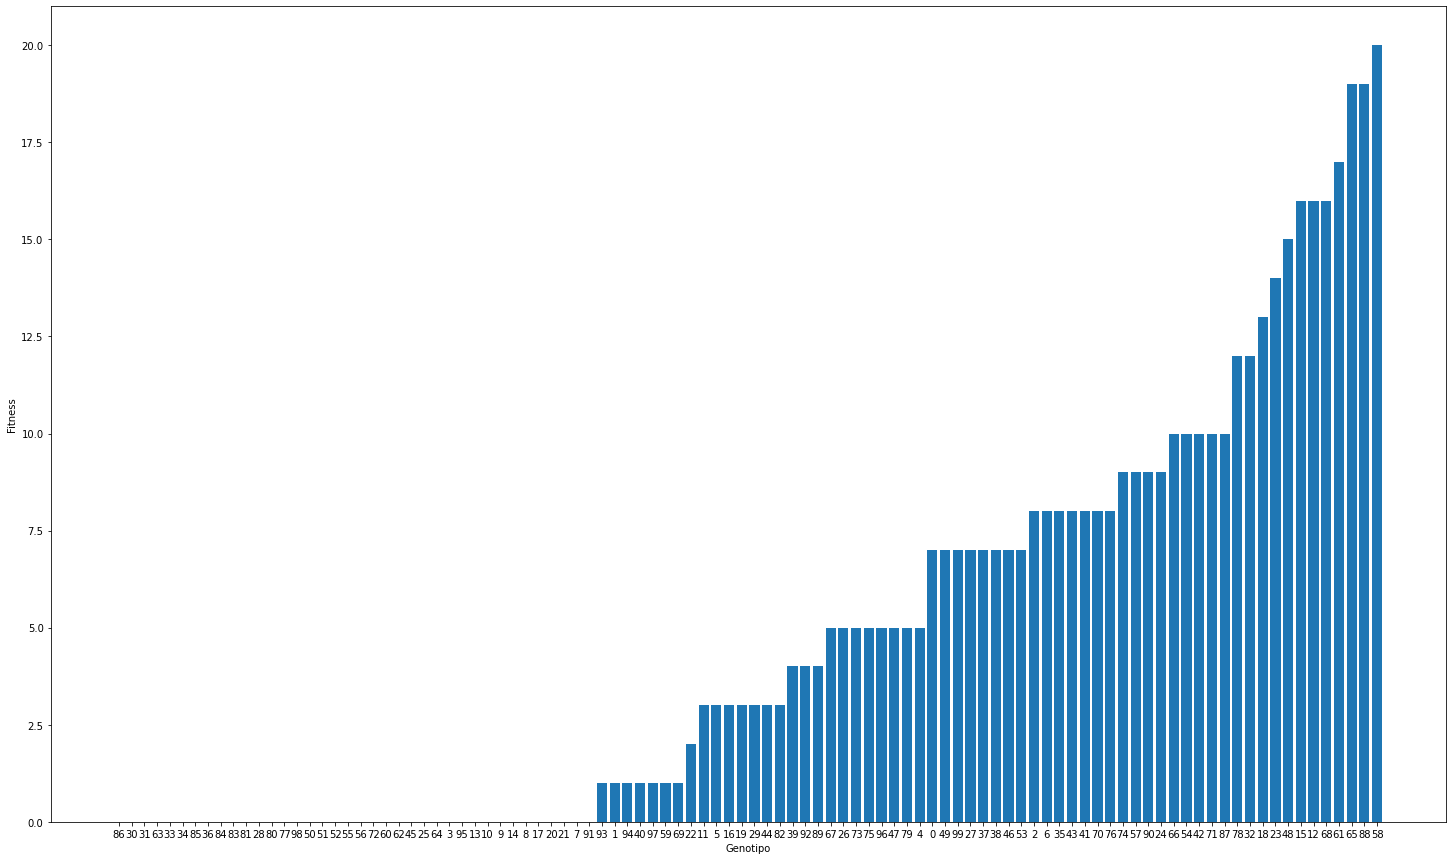

In [15]:
f,ax=plt.subplots(nrows=1,ncols=1,figsize=(25,15))
ax.bar(np.arange(len(fitnessV_order)),fitnessV_order)
ax.set_xlabel('Genotipo')
ax.set_xticks(np.arange(len(indexOrder)),indexOrder)
ax.set_ylabel('Fitness')

In [16]:
binGen[:10,:]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [17]:
binGen.sum(axis=1)

array([1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 2., 0., 0., 3., 1.,
       0., 3., 1., 0., 0., 1., 2., 2., 0., 2., 1., 0., 1., 0., 0., 2., 0.,
       0., 1., 0., 2., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 4., 1., 0.,
       0., 0., 1., 1., 0., 0., 2., 3., 1., 0., 3., 0., 0., 0., 2., 1., 2.,
       2., 1., 1., 2., 0., 1., 1., 1., 1., 0., 2., 1., 0., 0., 1., 0., 0.,
       0., 0., 2., 3., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1.])

Relación entre el número de genes y el _fitness_

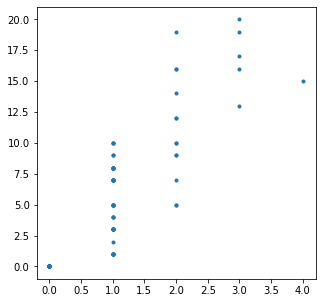

In [18]:
f,ax=plt.subplots(nrows=1,ncols=1,figsize=(5,5))
ax.plot(binGen.sum(axis=1),fitnessV,'.')

## Mutación de un gen

Una de las maneras de incluir diversidad en la población a partir de los genotipos existentes consiste en considerar una probabilidad de mutación por dígito que durante el proceso de replicación produce genotipos distintos.

In [19]:
probMutacion = 0.1
numsample = int(np.round(np.random.uniform(low=1,high = probMutacion*nu,size=1)))
numsample

1

In [20]:
genToMutate = np.random.choice(np.arange(nu),size=numsample,replace=False)
genToMutate

array([2])

In [21]:
binGen[:10,:]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [22]:
for gg in genToMutate:
    binGen[:,gg]=(binGen[:,gg]+1)%2

In [23]:
binGen[:10,:]

array([[0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

## Función mutación

Define una función `mutN` que realice la mutación por dígito y aplícala a toda la población de tamaño $N$. Antes guarda la población en otra matriz, por ejemplo, `binGen_anterior`

In [24]:
binGen[1,:]

array([1., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
def mutN(genotipo,probMut,numGenesGenotipo):
    
    numGenesMutar = int(np.round(np.random.uniform(low=1,high = probMut*numGenesGenotipo,size=1)))
    
    for el in np.arange(genotipo.shape[0]):
        
        genesToMutate = np.random.choice(np.arange(numGenesGenotipo),size=numGenesMutar,replace=False)
        
        for gen in genesToMutate:
            
            genotipo[el,gen]=(genotipo[el,gen]+1)%2
    
    return genotipo,numGenesMutar

In [26]:
probUno = 0.1
N = 100
nu = 10
binGen = crearGenoma(N,nu,probUno)
binGenInit = binGen.copy()
binGen[:10,:]

array([[1., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [27]:
probMutacion = 0.1
binGen,nGen = mutN(binGen,probMutacion,nu)
print('Número de genes mutados: ',nGen)
binGen[:10,:]

Número de genes mutados:  1


array([[1., 0., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0.]])

## Combinación de los nuevos genomas y los anteriores y ranking

Después de realizar la replicación con mutación de todos los genotipos de la población hay que proceder a agrupar y ordenar la población para preparar la selección de los genotipos con el mayor fitness.

In [28]:
combinedGenoma = np.zeros((2*N,nu))
combinedGenoma[:N,:] = binGenInit
combinedGenoma[N:,:] = binGen

In [29]:
combinedGenoma[:10,:]

array([[1., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [30]:
combinedGenoma[N:N+10,:]

array([[1., 0., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 0.]])

In [31]:
fitnessV = []
vector = np.arange(nu)+1

for ind in range(combinedGenoma.shape[0]):
    fit = vector.dot(combinedGenoma[ind,:])
    fitnessV.append(fit)

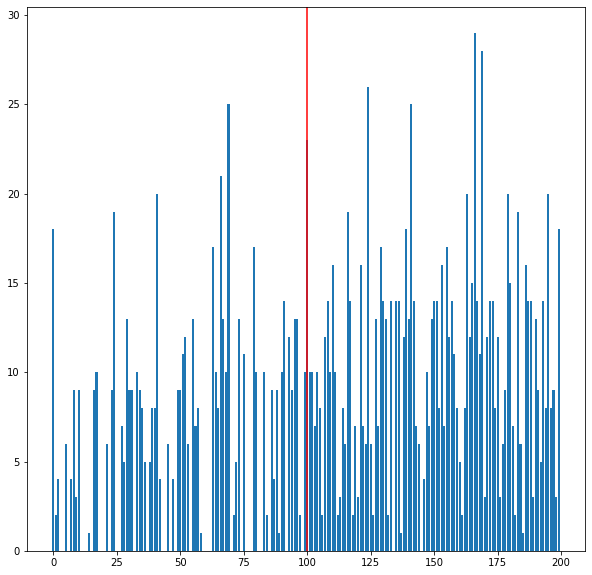

In [32]:
f,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
ax.bar(np.arange(len(fitnessV)),fitnessV)
ax.axvline(N,color='red')

In [33]:
fitnessOrderIndex = np.argsort(fitnessV)[::-1]

In [34]:
orderedGenoma = np.zeros((2*N,nu))
for ii,fit in enumerate(fitnessOrderIndex):
    orderedGenoma[ii,:] = combinedGenoma[fit,:]

In [35]:
fitnessVOrd = []
vector = np.arange(nu)+1

for ind in range(orderedGenoma.shape[0]):
    fit = vector.dot(orderedGenoma[ind,:])
    fitnessVOrd.append(fit)

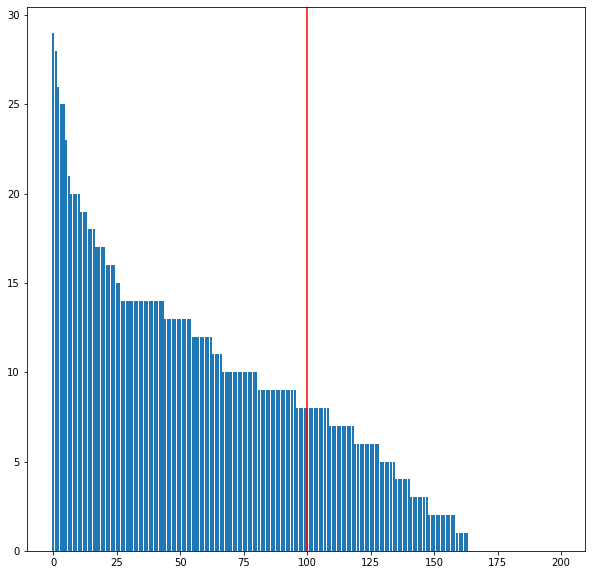

In [36]:
f,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
ax.bar(np.arange(len(fitnessVOrd)),fitnessVOrd)
ax.axvline(N,color='red')

## Selección 

Una de las maneras de seleccionar los genotipos que se han creado por replicación-mutación es la denominada elistista, que consiste en crear una población del mismo tamaño $N$ a partir de los genotipos con mejor fitness. En otras palabras, elegir los $N$ primeros del ranking. Utiliza una selección elistista para escoger una población de $N$
genotipos para la siguiente generación.

In [37]:
nuevaPoblacion = orderedGenoma[:N,:]

## Representación de los resultados

Calculamos y representamos los nuevos valores del fitness de la población y comparamos con los de la población anterior. En concreto, el fitness medio y su varianza, así como el mínimo y el máximo. También representa
su histograma. Compara con los valores que tenía la población en el paso inicial.

In [38]:
nuevaPoblacion.shape

(100, 10)

In [39]:
binGenInit.shape

(100, 10)

In [40]:
fitnessANT = []
fitnessPOST = []

vector = np.arange(nu)+1

for gen in range(N):
    fitA = vector.dot(binGenInit[gen,:])
    fitP = vector.dot(nuevaPoblacion[gen,:])
    fitnessANT.append(fitA)
    fitnessPOST.append(fitP)

fitnessANT = np.asarray(fitnessANT)
fitnessPOST = np.asarray(fitnessPOST)
bothFitness = [fitnessANT,fitnessPOST]

In [41]:
maxFit = np.max((np.max(fitnessANT),np.max(fitnessPOST)))

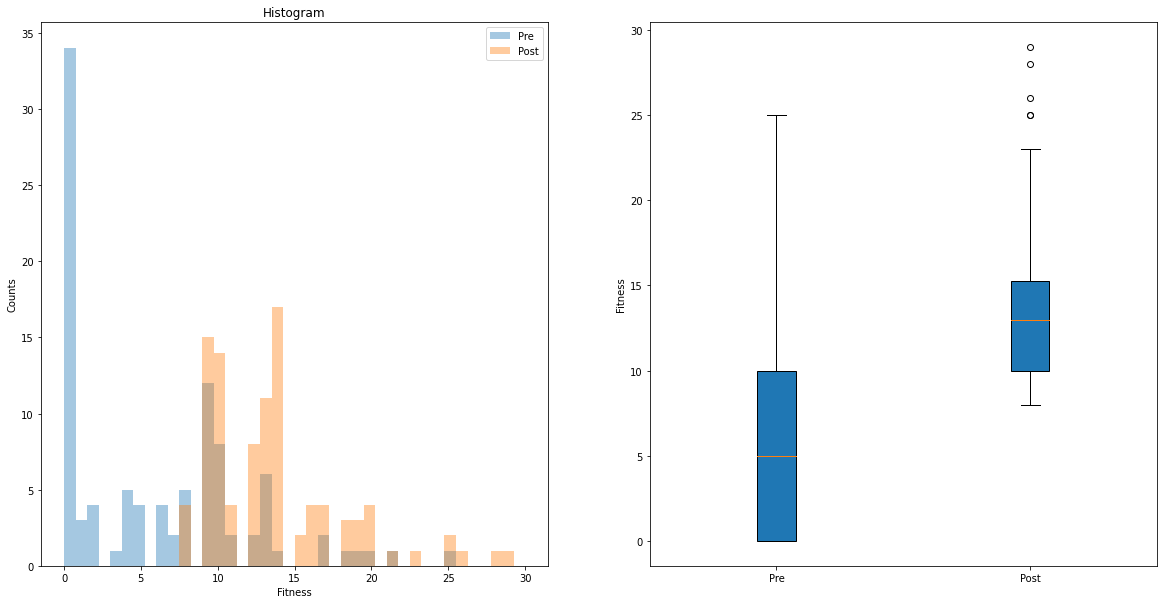

In [44]:
f,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,10))
ax[0].hist(fitnessANT,bins=40,range=(0,maxFit+1),alpha=0.4,label='Pre')
ax[0].hist(fitnessPOST,bins=40,range=(0,maxFit+1),alpha=0.4,label='Post')
ax[1].boxplot(bothFitness,vert=True,patch_artist=True,labels=['Pre','Post'])
ax[0].set_xlabel('Fitness')
ax[1].set_ylabel('Fitness')
ax[0].set_ylabel('Counts')
ax[0].set_title('Histogram')
ax[0].legend()
plt.show()

## Ejercicio: Bucle de evolución-selección

Utiliza los ejercicios anteriores para definir un bucle de replicación-selección de la población a partir de una población inicial. El número de iteraciones debe ser suficientemente elevado para permitir la convergencia de la fitness medio de la población. 

¿Podrías formular alguna conjetura sobre hacia qué fitness medio tenderá la población? 

¿Cómo depende la convergencia con la tasa de mutación?